 #                     <center> New Peruvian Restaurant in Manhattan, NY<center>

![](Peruvian_food2.jpg)

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction to Business Case</a>

2. <a href="#item2">Business Case Questions</a>

3. <a href="#item3">Data Section</a>

4. <a href="#item4">Methodlogy</a>

5. <a href="#item5">Results</a> 
      
6. <a href="#item5">Recomendations</a>   
</font>
</div>

## 1. Introduction to Business Case

A Peruvian entrepreneur that counts with more than 50 restaurants in Peru hired my data science consulting company to investigate the possible location to open a new restaurant in New York City, specifically in Manhattan city. New York City has been the most populous city in the United States. It has a long history of multicultural immigration, which makes it very attractive to open a new Peruvian restaurant.  Furthermore, most people associate Manhattan, NY, as the city never sleeps, which makes it an excellent feature to initiate a new culinary business. Peruvian food has experimented with an exponential change in the last ten years, and it has been considered one of the world's best culinary destinations.  The biodiversity and multicultural heritage are the main features that make Peruvian food unique and the best place in the world to dine. Therefore, the gastronomic entrepreneur wants to take advantage of the Peruvian food excellent reputation and start a new business opportunity of opening a new restaurant in the borough's most popular restaurants, Manhattan city, NY.

## 2. Business Case Questions

The next questions should be answered after the evaluation of business case.
1. How many Peruvian restaurants are in Manhattan?
2. What is the best location in Manhattan City to open a Peruvian restaurant?
3. What are other potential neighborhoods in Manhattan for Peruvian Cuisine?
4. Which neighborhoods lack Peruvian restaurants?


## 3. Data Section

The following data is needed to get the solution for this case.
- List of Boroughs, Neighborhoods, as well as the latitudes and longitudes from each neighborhoods in New York:  https://cocl.us/new_york_dataset . The list of Boroughs, Neighborhoods, latitudes, and longitudes are needed to build the business case. After loading and exploring the data, it is then transformed into a data frame using Pandas. As the evaluation is focused on Manhattan, it is filtered to obtain only Manhattan's neighborhoods.
- List of 100 venues around 1000 meters of radius in Manhattan: Foursquare API. This list will provide information on venus around 1000 meters from Manhattan city. 
- Venue data of Peruvian restaurants in Manhattan city: Foursquare API. The previous data is then filtered to obtain the existing business of Peruvian restaurants already in operation around Manhattan city. This data will be merged with the data of neighborhoods in Manhattan.


## 4. Metodology

The methodology established follows the process shown in figure 1. It starts by acquiring the data and cleaning it. In this process, the data is collected from the link https://cocl.us/new_york_dataset and converted to a data frame format using Pandas. After the data is ready in a data frame format, the second process of exploratory data analysis starts by evaluating it to obtain relevant information that serves as input to the predictive model. Finally, one predictive model is chosen to observe the best location for opening a new Peruvian Restaurant in Manhattan. How we are exploring neighborhoods in Manhattan, the k-means clustering will be used for this proposal. K-means is an unsupervised machine learning algorithm that groups similar data points by trying to discover fundamental patterns. Hence it must fix numbers of K to make the clusters of the dataset. 

![](process.png)

Importing all the dependences needed for this evaluation

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### a)	Data acquisition and cleaning.

The evaluation starts by acquiring the data of New York neighborhoods from the following URL link https://cocl.us/new_york_dataset ,then the raw data in json extension is conversated to data frame format using pandas.

* Accessing to the data through the next link   https://geo.nyu.edu/catalog/nyu_2451_34572

In [2]:
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()

* Let's take a look at the first item in this list.

In [3]:
neighborhoods_data = resp['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

* define the dataframe columns and instantiate the dataframe

In [4]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [5]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

* Results of Data Frame

In [6]:
new_york_data=neighborhoods
new_york_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

### b)	Exploratory data Analysis.

* Vizualise the Neighborhoods per Borough in New York

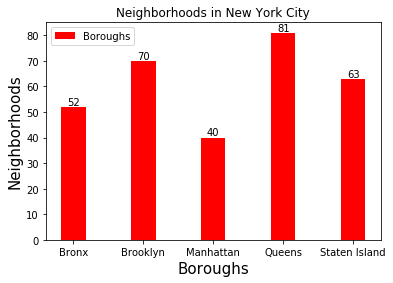

In [7]:
X=new_york_data.Borough
Y=new_york_data.groupby('Borough')['Neighborhood'].count()
N=[]
for i in Y:
    N.append(i)
#Nx=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
Borough = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
labels=Borough


x = np.arange(len(Borough))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, N, width, label='Boroughs', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Neighborhoods',fontsize = 15)
ax.set_title('Neighborhoods in New York City')
ax.set_xlabel('Boroughs',fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
                  

autolabel(rects1)
#autolabel(rects2)

#fig.tight_layout()

plt.show()

* Revising the number of boroughs and neighborhoods

In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)
new_york_data.shape

The dataframe has 5 boroughs and 306 neighborhoods.


(306, 4)

* Use geopy library to get the latitude and longitude values of New York City.

In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


* Create map of New York using latitude and longitude values

In [10]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

![](map1.png)

* Define Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'S5IVBRZHUGOEIVIGZ2QTK33VQXNV0ZSL0UV3UCZW3YWUY1QU' # your Foursquare ID
CLIENT_SECRET = 'O5POJ5RKMLAN5PM04OVGMQAMK5EYYECSJF0QEZ3OHQ1AA5Z0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S5IVBRZHUGOEIVIGZ2QTK33VQXNV0ZSL0UV3UCZW3YWUY1QU
CLIENT_SECRET:O5POJ5RKMLAN5PM04OVGMQAMK5EYYECSJF0QEZ3OHQ1AA5Z0


* __Cluster only the neighborhoods in Manhattan : As mentioned in the introduction, the Peruvian Entrepreneur wants to open the new Peruvian restaurant in Manhattan city, hence the evaluation will be focused in Manhattan’s neighborhoods__.

In [12]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()
manhattan_data.shape

(40, 4)

In [13]:
address = 'Manhattan, NY'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7896239 -73.9598939


* Create map of Manhattan using latitude and longitude values


In [14]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

![](map2.png)

* Extracting 100 venues with 1000 meters of radius from Manhattan: Foursquare API with 100 venues of limit and 1000 meters radius is used to obtain the venues from Manhattan, which yields 3178 venues around the city.

In [15]:
radius = 1000
LIMIT=100

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


* Let's check the size of resulting data frame for nighborhoods in Manhattan

In [18]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3178, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Marble Hill              40.876551               -73.91066   
1  Marble Hill              40.876551               -73.91066   
2  Marble Hill              40.876551               -73.91066   
3  Marble Hill              40.876551               -73.91066   
4  Marble Hill              40.876551               -73.91066   

                              Venue  Venue Latitude  Venue Longitude  \
0                          Arturo's       40.874412       -73.910271   
1                       Bikram Yoga       40.876844       -73.906204   
2                     Tibbett Diner       40.880404       -73.908937   
3                         Starbucks       40.877531       -73.905582   
4  Astral Fitness & Wellness Center       40.876705       -73.906372   

  Venue Category  
0    Pizza Place  
1    Yoga Studio  
2          Diner  
3    Coffee Shop  
4            Gym

* Revise the number of venues returned for each neighborhood and Checking the uniques categories

In [19]:
manhattan_venues.groupby('Venue').count()
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 325 uniques categories.


* __Cheking whether exist Peruvian Restaurants in the venues provided by Foursquare API__

In [20]:
"Peruvian Restaurant" in manhattan_venues['Venue Category'].unique()

True

* Analyze Each Neighborhood in Manhattan: Once the venues from Manhattan are converted to data frame, we use dummies function to convert categorical data to numerical values. Then the data frame can be grouped by neighborhoods by taking the mean of the frequency of occurrence of each category.

In [21]:
to_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(3178, 326)


Neighborhoods  Accessories Store  Adult Boutique  African Restaurant  \
0   Marble Hill                  0               0                   0   
1   Marble Hill                  0               0                   0   
2   Marble Hill                  0               0                   0   
3   Marble Hill                  0               0                   0   
4   Marble Hill                  0               0                   0   

   American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
0                    0             0       0                 0   
1                    0             0       0                 0   
2                    0             0       0                 0   
3                    0             0       0                 0   
4                    0             0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   0           0                      0   
1                 0                   0           0                      0   
2                 0                   0           0                      0   
3                 0                   0           0                      0   
4                 0                   0           0                      0   

   Austrian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                    0          0           0           0       0     0    0   
1                    0          0           0           0       0     0    0   
2                    0          0           0           0       0     0    0   
3                    0          0           0           0       0     0    0   
4                    0          0           0           0       0     0    0   

   Baseball Field  Basketball Court  Basketball Stadium  Bed & Breakfast  \
0               0                 0                   0                0   
1               0                 0                   0                0   
2               0                 0                   0                0   
3               0                 0                   0                0   
4               0                 0                   0                0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0         0            0           0              0                         0   
1         0            0           0              0                         0   
2         0            0           0              0                         0   
3         0            0           0              0                         0   
4         0            0           0              0                         0   

   Bike Shop  Bike Trail  Bistro  Board Shop  Boat or Ferry  Bookstore  \
0          0           0       0           0              0          0   
1          0           0       0           0              0          0   
2          0           0       0           0              0          0   
3          0           0       0           0              0          0   
4          0           0       0           0              0          0   

   Boutique  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Bridal Shop  \
0         0           0                     0               0            0   
1         0           0                     0               0            0   
2         0           0                     0               0            0   
3         0           0                     0             

In [22]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()
print(to_grouped.shape)
to_grouped

(40, 326)


Neighborhoods  Accessories Store  Adult Boutique  \
0     Battery Park City           0.000000            0.00   
1         Carnegie Hill           0.000000            0.00   
2        Central Harlem           0.000000            0.00   
3               Chelsea           0.000000            0.00   
4             Chinatown           0.000000            0.00   
5          Civic Center           0.000000            0.00   
6               Clinton           0.000000            0.00   
7           East Harlem           0.000000            0.00   
8          East Village           0.000000            0.00   
9    Financial District           0.000000            0.00   
10             Flatiron           0.000000            0.00   
11             Gramercy           0.000000            0.00   
12    Greenwich Village           0.000000            0.00   
13     Hamilton Heights           0.000000            0.00   
14         Hudson Yards           0.000000            0.00   
15               Inwood           0.000000            0.00   
16           Lenox Hill           0.000000            0.00   
17       Lincoln Square           0.000000            0.00   
18         Little Italy           0.000000            0.00   
19      Lower East Side           0.000000            0.00   
20     Manhattan Valley           0.000000            0.00   
21       Manhattanville           0.000000            0.00   
22          Marble Hill           0.000000            0.00   
23              Midtown           0.000000            0.00   
24        Midtown South           0.000000            0.00   
25  Morningside Heights           0.000000            0.00   
26          Murray Hill           0.000000            0.00   
27                 Noho           0.000000            0.00   
28     Roosevelt Island           0.000000            0.00   
29                 Soho           0.000000            0.00   
30      Stuyvesant Town           0.000000            0.00   
31         Sutton Place           0.000000            0.01   
32              Tribeca           0.000000            0.00   
33           Tudor City           0.000000            0.00   
34           Turtle Bay           0.000000            0.00   
35      Upper East Side           0.000000            0.00   
36      Upper West Side           0.000000            0.00   
37   Washington Heights           0.010989            0.00   
38         West Village           0.000000            0.00   
39            Yorkville           0.000000            0.00   

    African Restaurant  American Restaurant  Antique Shop    Arcade  \
0             0.000000             0.014493          0.00  0.000000   
1             0.000000             0.010870          0.00  0.000000   
2             0.066667             0.044444          0.00  0.000000   
3             0.000000             0.040000          0.00  0.000000   
4             0.000000             0.030000          0.00  0.000000   
5             0.000000             0.030000          0.01  0.000000   
6             0.000000             0.040000          0.00  0.000000   
7             0.000000             0.000000          0.00  0.000000   
8             0.000000             0.020000          0.00  0.000000   
9             0.000000             0.040000          0.00  0.000000   
10            0.000000             0.030000          0.00  0.000000   
11            0.000000             0.043011          0.00  0.010753   
12            0.000000             0.020000          0.00  0.000000   
13            0.000000             0.000000          0.00  0.000000   
14            0.000000             0.071429          0.00  0.000000   
15            0.000000             0.035714          0.00  0.000000   
16            0.000000             0.000000          0.00  0.000000   
17            0.000000             0.030612          0.00  0.000000   
18            0.000000             0.000000          0.00  0.000000   
19            0.000000             0.000000    

* __Filtering the data to obtain the venues of Peruvian Restaurants__.

In [23]:
len(to_grouped[to_grouped["Peruvian Restaurant"] > 0])

5

* __There are five Peruvian Restaurants in different neighborhoods around Manhattan__

In [24]:
to_Peruvian = to_grouped[["Neighborhoods","Peruvian Restaurant"]]
to_Peruvian.head()

Neighborhoods  Peruvian Restaurant
0  Battery Park City                  0.0
1      Carnegie Hill                  0.0
2     Central Harlem                  0.0
3            Chelsea                  0.0
4          Chinatown                  0.0

### C)	Predictive Modeling
The next step is to cluster the current Peruvian restaurants inside the Manhattan neighborhoods. K-means is an unsupervised machine learning algorithm that groups similar data points by trying to discover fundamental patterns. Hence it must fix numbers of K to make the clusters of the dataset. It is very simple tool for clustering and clearly suited for modeling the data in this project. The Manhattan neighborhoods are grouped into 3 clusters based in the frequency of occurrence of Peruvian restaurants. The Manhattan neighborhoods are grouped into three clusters that display the information needed to make decisions about the best place to open a new Peruvian restaurant. The blue cluster contains Neighborhoods with more Peruvian Restaurants. The green cluster has less Peruvian Restaurants. On the other hand, the red cluster doesn’t contain any Peruvian restaurant providing relevant evidence that the gastronomic business can be opened in any of the neighborhoods located in the red cluster.	

* __Cluster Neighborhoods in Manhattan__

In [25]:
from sklearn.cluster import KMeans
toclusters = 3

to_clustering = to_Peruvian.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0])

In [26]:
to_merged = to_Peruvian.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [27]:
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head(5)

Neighborhood  Peruvian Restaurant  Cluster Labels
0  Battery Park City                  0.0               0
1      Carnegie Hill                  0.0               0
2     Central Harlem                  0.0               0
3            Chelsea                  0.0               0
4          Chinatown                  0.0               0

In [28]:
to_merged = to_merged.join(manhattan_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(3178, 9)


Neighborhood  Peruvian Restaurant  Cluster Labels  \
0  Battery Park City                  0.0               0   
0  Battery Park City                  0.0               0   
0  Battery Park City                  0.0               0   
0  Battery Park City                  0.0               0   
0  Battery Park City                  0.0               0   

   Neighborhood Latitude  Neighborhood Longitude  \
0              40.711932              -74.016869   
0              40.711932              -74.016869   
0              40.711932              -74.016869   
0              40.711932              -74.016869   
0              40.711932              -74.016869   

                                Venue  Venue Latitude  Venue Longitude  \
0         Battery Park City Esplanade       40.711622       -74.017907   
0  Waterfront Plaza, Brookfield Place       40.713241       -74.016241   
0                         Hudson Eats       40.712666       -74.015901   
0            Equinox Brookfield Place       40.712704       -74.014995   
0             Brookfield Place (BFPL)       40.713240       -74.015193   

  Venue Category  
0           Park  
0          Plaza  
0     Food Court  
0            Gym  
0  Shopping Mall

In [29]:
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

Neighborhood  Peruvian Restaurant  Cluster Labels  \
0   Battery Park City                  0.0               0   
24      Midtown South                  0.0               0   
24      Midtown South                  0.0               0   
24      Midtown South                  0.0               0   
24      Midtown South                  0.0               0   

    Neighborhood Latitude  Neighborhood Longitude  \
0               40.711932              -74.016869   
24              40.748510              -73.988713   
24              40.748510              -73.988713   
24              40.748510              -73.988713   
24              40.748510              -73.988713   

                          Venue  Venue Latitude  Venue Longitude  \
0   Battery Park City Esplanade       40.711622       -74.017907   
24             Urban Outfitters       40.751170       -73.988150   
24               Patent Pending       40.745133       -73.990361   
24                       &pizza       40.745205       -73.988231   
24                      Hangawi       40.746927       -73.984779   

                   Venue Category  
0                            Park  
24                 Clothing Store  
24                      Speakeasy  
24                    Pizza Place  
24  Vegetarian / Vegan Restaurant

* __Let's visualize the resuls of clustering__

In [30]:
map_clusters = folium.Map(location=[latitude, longitude],zoom_start=14)

# set color scheme for the clusters


# add markers to the map
markers_colors={}
markers_colors[0] = 'red'
markers_colors[1] = 'blue'
markers_colors[2] = 'green'
markers_colors[3] = 'yellow'
markers_colors[4] = 'cyan'
markers_colors[5] = 'black'
for lat, lon, cluster, poi in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Cluster Labels'], to_merged['Neighborhood']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
       
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

![](map3.png)

###  Examine clusters

* __Examining the red cluster (cluster cero): Neighborhoods with cero Peruvian restaurants__

In [31]:
#Cluster 0
to_merged.loc[(to_merged['Cluster Labels'] ==0) & (to_merged['Venue Category'] == 'Peruvian Restaurant') ]

Empty DataFrame
Columns: [Neighborhood, Peruvian Restaurant, Cluster Labels, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category]
Index: []

* __Examining the blue cluster (cluster 1) : Neighborhoods with more Peruvian Restaurants__ 

In [32]:
#Cluster 1
to_merged.loc[(to_merged['Cluster Labels'] ==1) & (to_merged['Venue Category'] == 'Peruvian Restaurant') ]

Neighborhood  Peruvian Restaurant  Cluster Labels  \
26      Murray Hill             0.010204               1   
39        Yorkville             0.010000               1   
6           Clinton             0.010000               1   
36  Upper West Side             0.011494               1   

    Neighborhood Latitude  Neighborhood Longitude         Venue  \
26              40.748303              -73.978332       Pio Pio   
39              40.775930              -73.947118       Pio Pio   
6               40.759101              -73.996119       Pio Pio   
36              40.787658              -73.977059  Flor de Mayo   

    Venue Latitude  Venue Longitude       Venue Category  
26       40.745535       -73.977626  Peruvian Restaurant  
39       40.779887       -73.947202  Peruvian Restaurant  
6        40.760636       -73.994714  Peruvian Restaurant  
36       40.785966       -73.976312  Peruvian Restaurant

* __Examining the green cluster (cluster 2): Neighborhoods with less Peruvian Restaurants__ 

In [33]:
#Cluster 2
to_merged.loc[(to_merged['Cluster Labels'] ==2) & (to_merged['Venue Category'] == 'Peruvian Restaurant') ]

Neighborhood  Peruvian Restaurant  Cluster Labels  Neighborhood Latitude  \
14  Hudson Yards             0.017857               2              40.756658   

    Neighborhood Longitude  Venue  Venue Latitude  Venue Longitude  \
14              -74.000111  Chirp       40.753377       -73.996116   

         Venue Category  
14  Peruvian Restaurant

## 5. Results

In this section, the answers released in the business case will be answered, having as basis the analyzed data.
1. __How many Peruvian restaurants are in Manhattan?__ Based on the evaluated data, there are five Peruvian restaurants around Manhattan.
2. __What is the best location in Manhattan City to open a Peruvian restaurant?__ Based on the k-means clustering algorithm used in Manhattan neighborhoods' data, the best place for opening a new Peruvian restaurant is in the red clustered neighborhoods. The optimal site can be in an area in the red cluster, not far from an existing Peruvian restaurant on the blue cluster. For example, a possible optimal location could be the East Harlem neighborhood. As shown in figure 5, the East Harlem area is not far from the Yorkville neighborhood that is clustered with blue color. The reason to open the new Peruvian restaurant not far from an actual Peruvian restaurant clustered in blue color is that actual restaurants already have a gained reputation, thus it can be favorable to open the new restaurant not far from a restaurant located in the blue cluster. 

3. __What are other potential neighborhoods in Manhattan for Peruvian Cuisine?__ Another option is to open a Peruvian restaurant in a red cluster neighborhood but far away from an existing Peruvian restaurant because it can be an excellent opportunity to obtain new customers without any similar competition around the neighborhood. 
4. __What neighborhoods lack Peruvian restaurants?__ The Manhattan neighborhoods in the red cluster don’t have a Peruvian restaurant. This information is relevant because it shows a great business opportunity to open a new Peruvian restaurant in one of these neighborhoods.


## 6. Recommendations

Based on the evaluation made, the Manhattan city provides a great business opportunity to initiate a new gastronomic business of Peruvian food.  This evaluation shows that most of the Peruvian restaurants are in the blue cluster neighborhoods (cluster 1) which is around Murray Hill, Yorkville, Clinton, and Upper West Side. The green cluster neighborhoods (cluster 2) has the less Peruvian restaurants around Manhattan. Finally, the red clusters (cluster cero) doesn’t have Peruvian restaurants in its neighborhoods. Therefore, a new Peruvian restaurant can be opened in one of these neighborhoods clustered in red, not far from an existing Peruvian restaurant located in the blue cluster, for instance in the East Harlem neighborhood that is clustred in red.


#                     <center> Thank !<center>